In [1]:
import sys
import os
sys.path.insert(0, 'analysator')
#os.environ['PTNOLATEX'] = '1'
from analysator import pytools as pt
import matplotlib.pyplot as plt
import numpy as np

Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using matplotlib version 3.5.1


In [2]:
filename = 'data/bulk.0000015.vlsv'

In [3]:
f = pt.vlsvfile.VlsvReader(file_name=filename)

Found population proton


In [4]:
f.list()
m = f.get_spatial_mesh_size()
print(m)
a = f.read_variable("vg_v")
print(a)
print(len(a))
t = f.read_parameter('time')
print(f't = {t}')

tag = PARAMETER
    time
    dt
    timestep
    fieldSolverSubcycles
    fileIndex
    xmin
    xmax
    ymin
    ymax
    zmin
    zmax
    xcells_ini
    ycells_ini
    zcells_ini
    version
    numWritingRanks
tag = VARIABLE
    CellID
    fg_b
    fg_e
    proton/vg_blocks
    proton/vg_rho_nonthermal
    proton/vg_v_nonthermal
    proton/vg_ptensor_nonthermal_diagonal
    proton/vg_ptensor_nonthermal_offdiagonal
    proton/vg_rho_thermal
    proton/vg_v_thermal
    proton/vg_ptensor_thermal_diagonal
    proton/vg_ptensor_thermal_offdiagonal
    proton/vg_ptensor_diagonal
    proton/vg_ptensor_offdiagonal
    proton/vg_rho
    proton/vg_v
    vg_b_vol
    vg_boundarytype
    vg_f_saved
    vg_rank
[1200    1    1]
[[-2.66698448e+05  4.34434731e+01 -1.31178814e+06]
 [-2.66699390e+05  4.72151292e+01 -1.31178692e+06]
 [-2.66699208e+05  4.66805985e+01 -1.31178649e+06]
 ...
 [-7.49629967e+05  3.72498840e+01 -1.29813111e+06]
 [-7.49633943e+05  3.30509251e+01 -1.29813487e+06]
 [-7.49638

Found population proton


cellid 1, x = -149925000.0, y = 0.0, z = 0.0
Input velocity grid cell size 30000.0
Getting offsets for population proton
Found 750208 v-space cells
Warning! Unable to find a MinValue or EffectiveSparsityThreshold value from the .vlsv file.
Using a default value of 1.e-16. Override with setThreshold=value.
Dropping velocity cells under setThreshold value 1e-16
Active f range is 8.062861096892771e-17 to 6.483853818434193e-12
Active v range is -3258.0 to 702.0
/Users/jonne/Plots/plot_vdf_proton_cellid_1_t150_xz.png



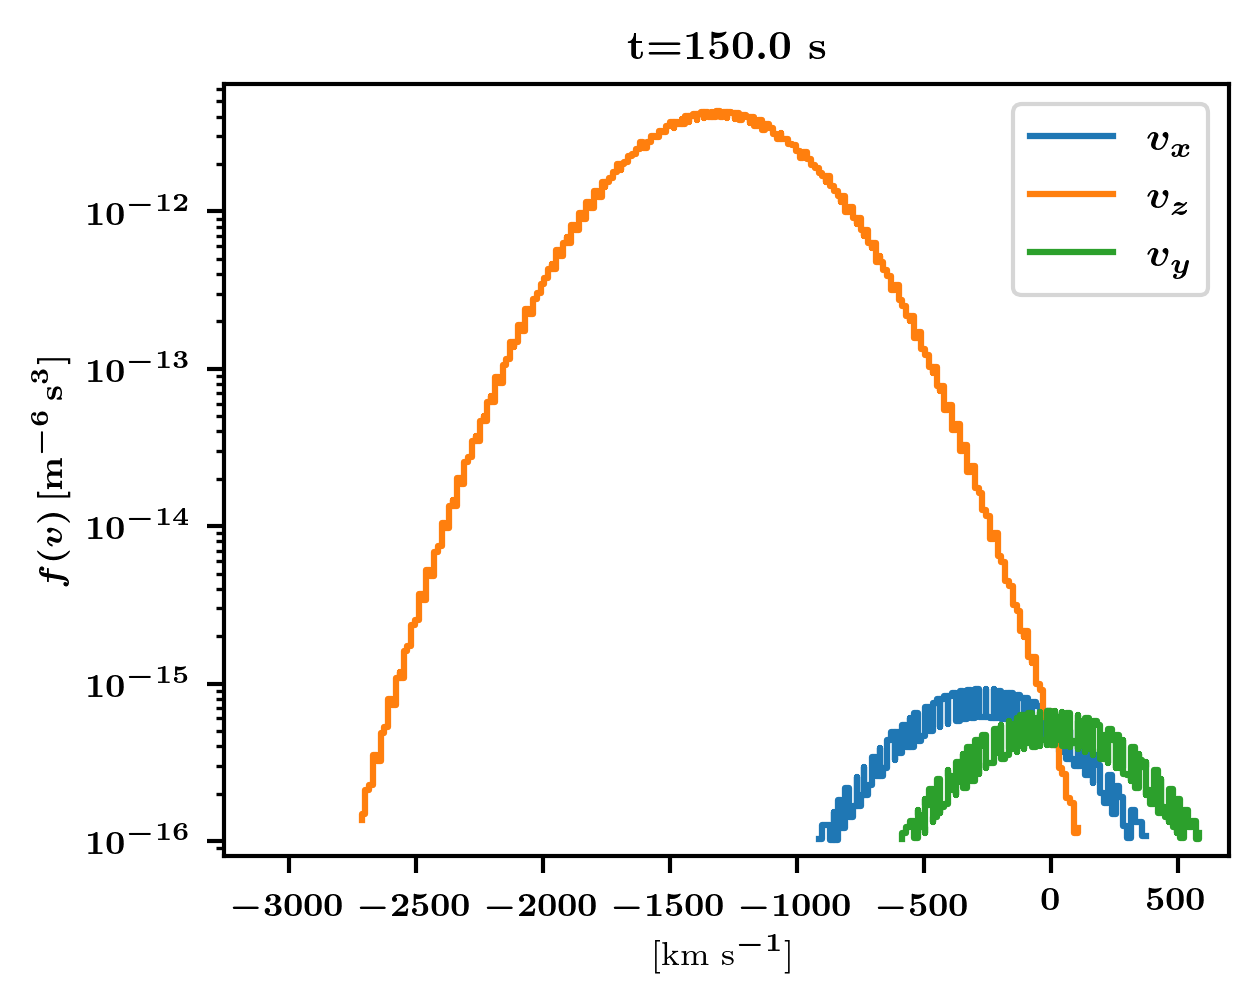

In [5]:
#pt.plot.plot_colormap?

#pt.plot.plot_colormap(filename=filename)
#pt.plot.plot_vdf_profiles(filename)

pt.plot.plot_vdf_profiles(filename=filename, cellids=[1])


In [6]:

#pt.plot.plot_colormap(filename='data/bulk.0000000.vlsv', var='proton/vg_rho', cellid=[1])

In [7]:

'''
If I understand your question about the "instances of variables" correctly, you were talking about variables like
"proton/vg_rho", "proton/vg_v", "proton/vg_pressure_diagonal", "vol_vg_b", etc. A full list and their meaning may be
found here https://github.com/fmihpc/analysator/wiki/Supported-variables-and-data-reducers . As you may have guessed, 
the variables that start with "proton/" prefixes are all derived quantities from the VDFs of protons in each spatial 
cell. We call these operations "reductions", and the corresponding methods for extracting them are named "reducers" 
in Python. Some of the variables are completely irrelevant, such as "vg_ranks" (which saves the MPI process rank 
relates to the data) and "dt" (which save the discrete time steps for the PDE solver); some may be irrelevant, such 
as the electromagnetic field quantities "fg_b", "fg_e", "vg_b_vol", "vg_e_vol".
'''


'\nIf I understand your question about the "instances of variables" correctly, you were talking about variables like\n"proton/vg_rho", "proton/vg_v", "proton/vg_pressure_diagonal", "vol_vg_b", etc. A full list and their meaning may be\nfound here https://github.com/fmihpc/analysator/wiki/Supported-variables-and-data-reducers . As you may have guessed, \nthe variables that start with "proton/" prefixes are all derived quantities from the VDFs of protons in each spatial \ncell. We call these operations "reductions", and the corresponding methods for extracting them are named "reducers" \nin Python. Some of the variables are completely irrelevant, such as "vg_ranks" (which saves the MPI process rank \nrelates to the data) and "dt" (which save the discrete time steps for the PDE solver); some may be irrelevant, such \nas the electromagnetic field quantities "fg_b", "fg_e", "vg_b_vol", "vg_e_vol".\n'

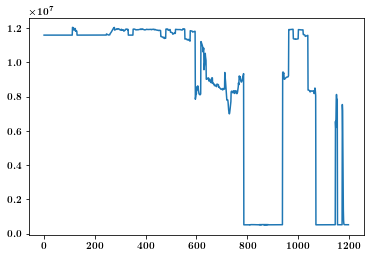

In [8]:
vg_rho = f.read_variable('proton/vg_rho')
#vg_v = f.read_variable('proton/vg_v')

var = f.read_variable('pop/vg_temperature')

plt.plot(var)
plt.show()



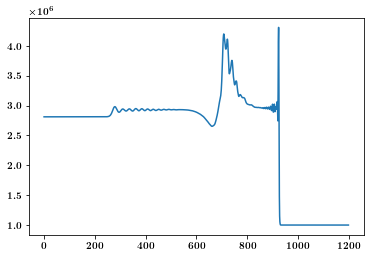

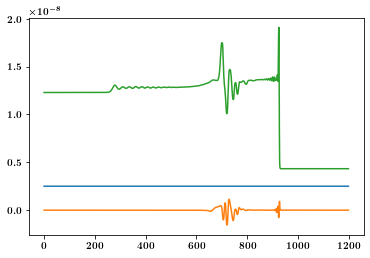

range(0, 25)

In [9]:
cellids = f.read_variable('cellid')
rho = f.read_variable('proton/vg_rho')

[xsize, ysize, zsize] = f.get_spatial_mesh_size()   
rho_shaped = rho[cellids.argsort()].reshape([ysize,xsize])

bvol = f.read_variable('vg_b_vol')
bvol_shaped = bvol[cellids.argsort()].reshape([ysize,xsize,3])

plt.plot(rho_shaped[0])
plt.show()

plt.plot(bvol_shaped[0])
plt.show()


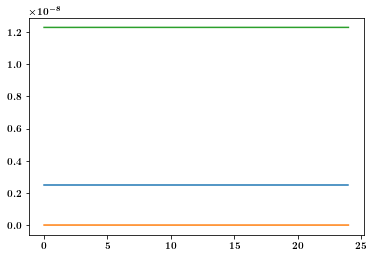

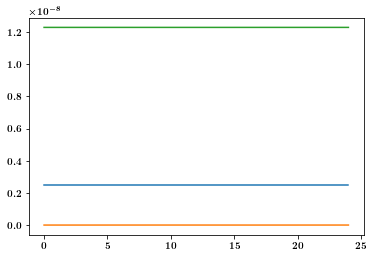

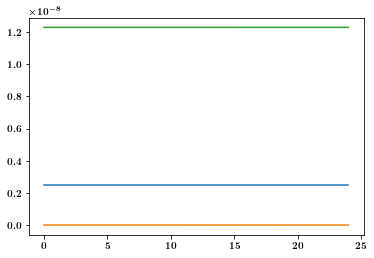

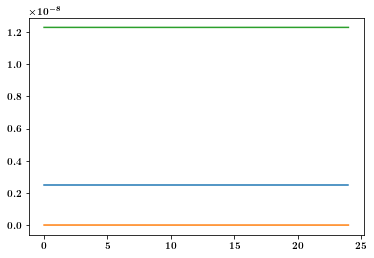

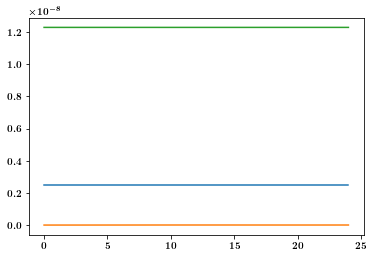

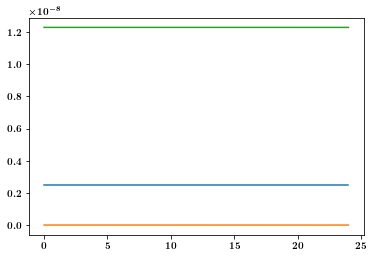

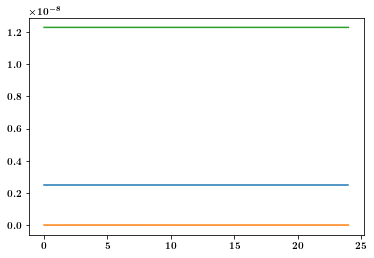

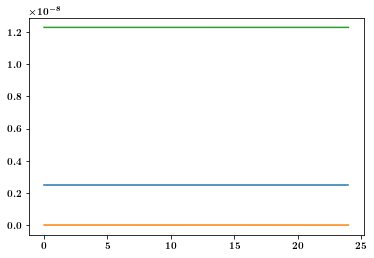

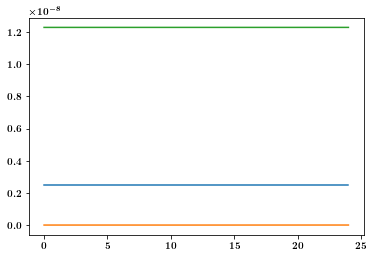

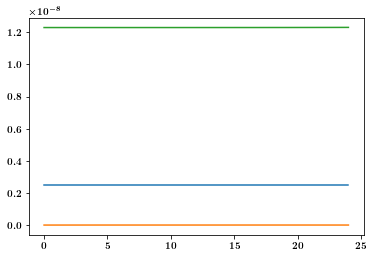

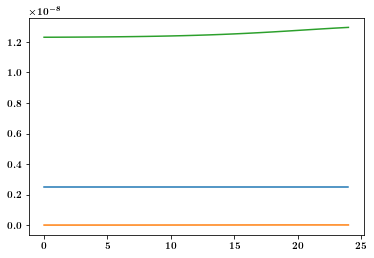

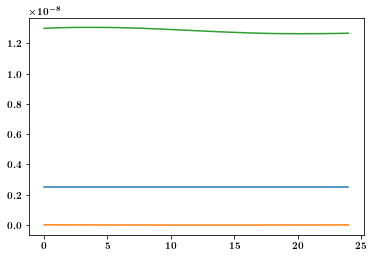

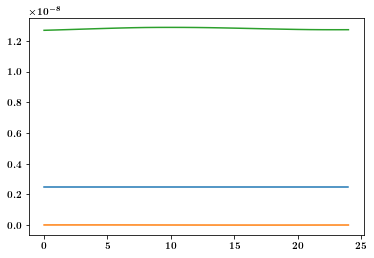

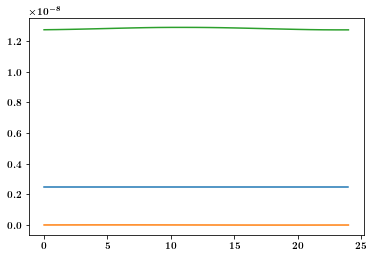

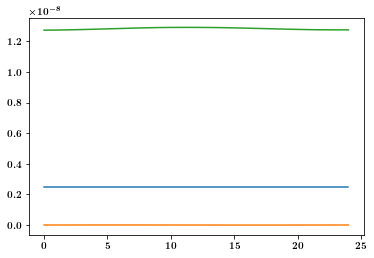

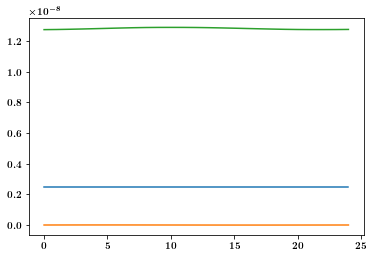

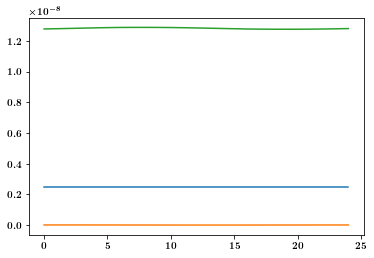

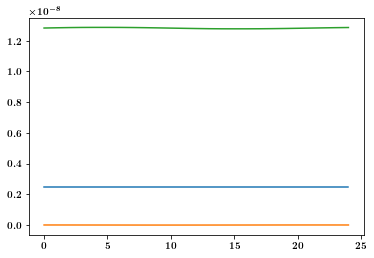

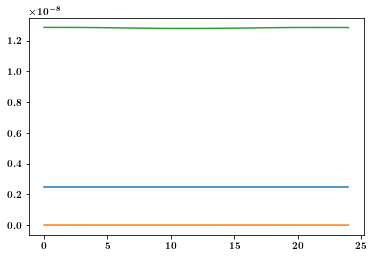

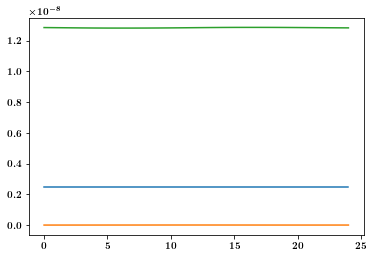

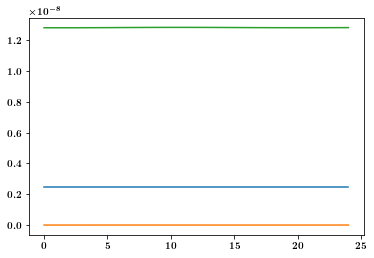

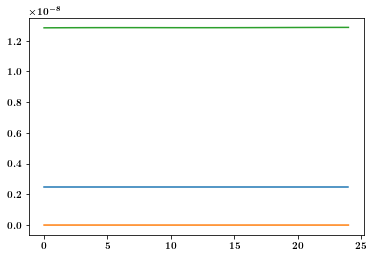

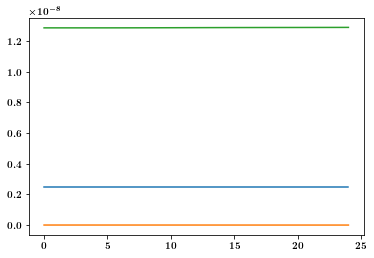

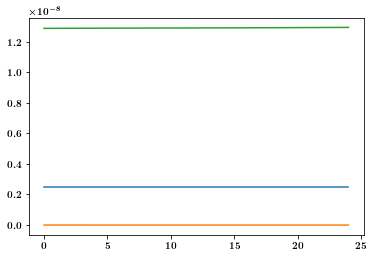

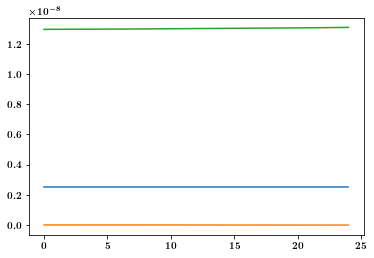

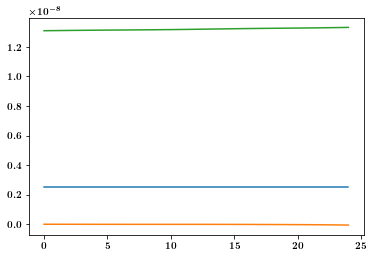

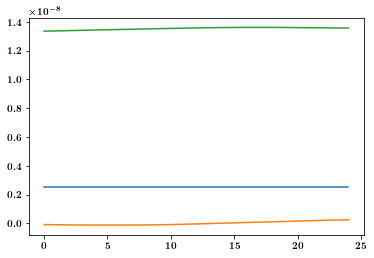

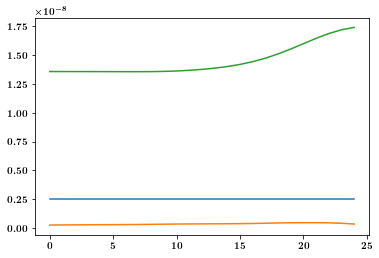

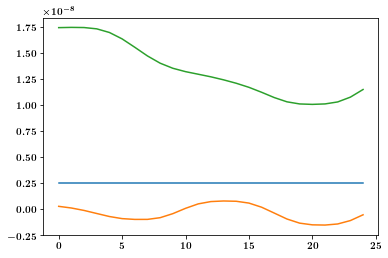

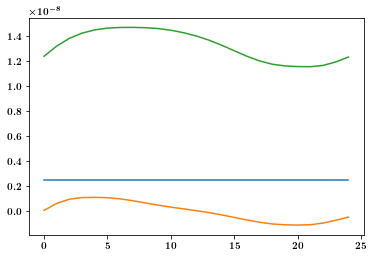

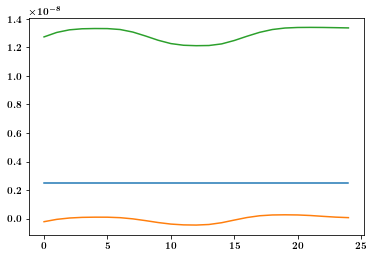

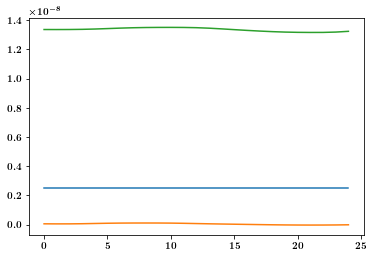

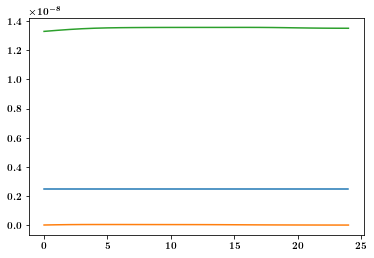

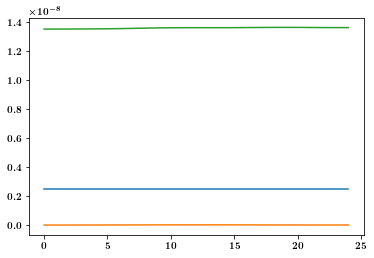

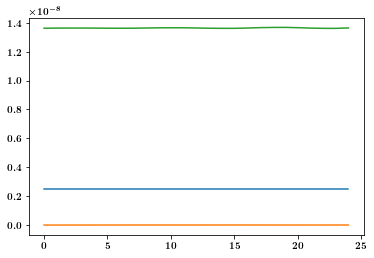

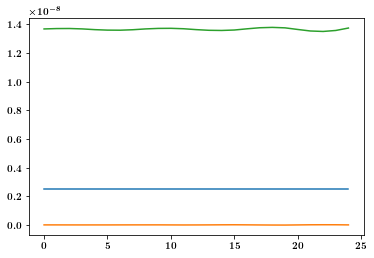

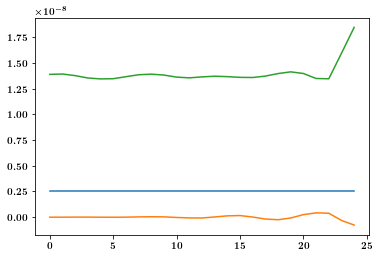

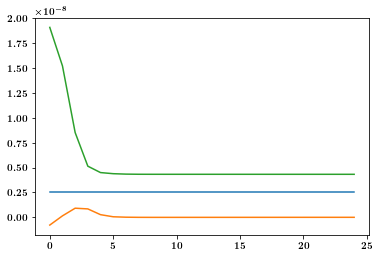

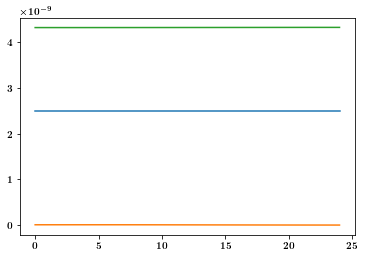

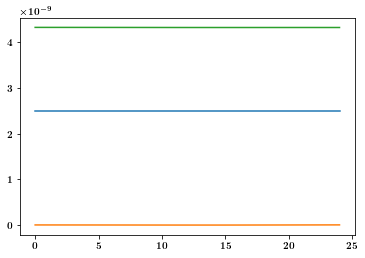

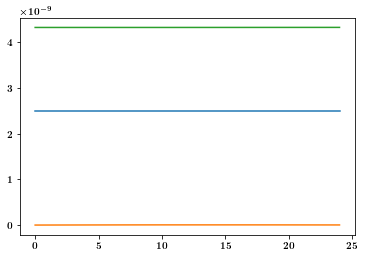

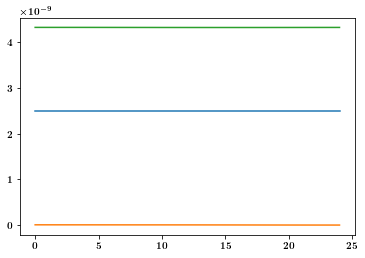

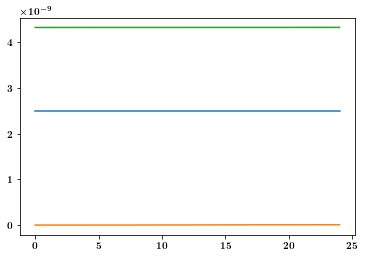

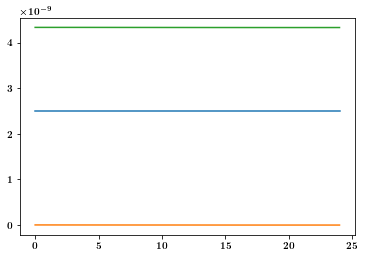

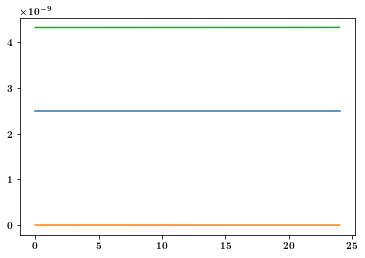

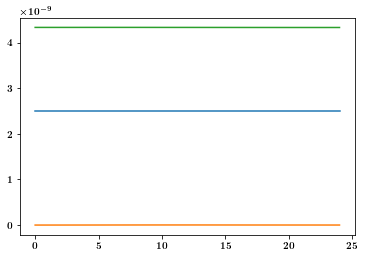

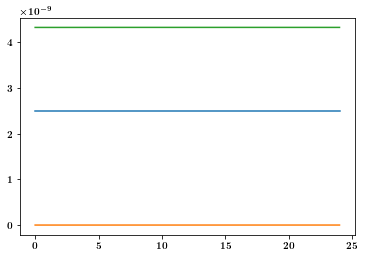

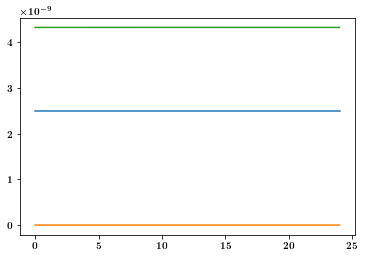

In [10]:
cell_count = 48

cellids = f.read_variable('cellid')
rho = f.read_variable('proton/vg_rho')

[xsize, ysize, zsize] = f.get_spatial_mesh_size()   
rho_shaped = rho[cellids.argsort()].reshape([ysize,xsize])

bvol = f.read_variable('vg_b_vol')
bvol_shaped = bvol[cellids.argsort()].reshape([ysize,xsize,3])

arr1 = np.array_split(bvol_shaped[0], cell_count)

for i in range(cell_count):
    plt.figure()
    plt.plot(arr1[i])
    plt.show()

In [42]:
# See how variables look for all the files
filenames = [
    'data/bulk.0000001.vlsv',
    'data/bulk.0000002.vlsv',
    'data/bulk.0000003.vlsv',
    'data/bulk.0000004.vlsv',
    'data/bulk.0000005.vlsv',
    'data/bulk.0000006.vlsv',
    'data/bulk.0000007.vlsv',
    'data/bulk.0000008.vlsv',
    'data/bulk.0000009.vlsv',
    'data/bulk.0000010.vlsv',
    'data/bulk.0000011.vlsv',
    'data/bulk.0000012.vlsv',
    'data/bulk.0000013.vlsv',
    'data/bulk.0000014.vlsv',
    'data/bulk.0000015.vlsv'
]


for filename in filenames:
    print(filename)
    f = pt.vlsvfile.VlsvReader(file_name=filename)
    cellids = f.read_variable('cellid')
    rho = f.read_variable('proton/vg_rho')

    [xsize, ysize, zsize] = f.get_spatial_mesh_size()   
    rho_shaped = rho[cellids.argsort()].reshape([ysize,xsize])

    bvol = f.read_variable('vg_b_vol')
    bvol_shaped = bvol[cellids.argsort()].reshape([ysize,xsize,3])

    #plt.plot(bvol_shaped[0])
    #plt.show()


data/bulk.0000001.vlsv
Found population proton
data/bulk.0000002.vlsv
Found population proton
data/bulk.0000003.vlsv
Found population proton
data/bulk.0000004.vlsv
Found population proton
data/bulk.0000005.vlsv
Found population proton
data/bulk.0000006.vlsv
Found population proton
data/bulk.0000007.vlsv
Found population proton
data/bulk.0000008.vlsv
Found population proton
data/bulk.0000009.vlsv
Found population proton
data/bulk.0000010.vlsv
Found population proton
data/bulk.0000011.vlsv
Found population proton
data/bulk.0000012.vlsv
Found population proton
data/bulk.0000013.vlsv
Found population proton
data/bulk.0000014.vlsv
Found population proton
data/bulk.0000015.vlsv
Found population proton
